In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
car_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/car.csv')
human_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/human.csv')
pillar_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/pillar.csv')
wall_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/wall.csv')

print('Car:',car_data.shape)
print('Human:',human_data.shape)
print('Pillar:',pillar_data.shape)
print('Wall:',wall_data.shape)

Car: (7640, 40)
Human: (9791, 40)
Pillar: (5791, 40)
Wall: (5506, 40)


In [3]:
human = human_data.loc[human_data['type'] == 'HUMAN'].iloc[:,4:]
car = car_data.loc[car_data['type'] == 'CAR'].iloc[:,4:]
pillar = pillar_data.loc[pillar_data['type'] == 'PILLAR'].iloc[:,4:]
wall = wall_data.loc[wall_data['type'] == 'WALL'].iloc[:,4:]

In [4]:
human_label = ['HUMAN']*human.shape[0]
car_label = ['CAR']*car.shape[0]
wall_label = ['WALL']*wall.shape[0]
pillar_label = ['PILLAR']*pillar.shape[0]
non_human_label = ['NON_HUMAN']*(car.shape[0] + wall.shape[0] + pillar.shape[0])

In [5]:
data = human.values.tolist() + car.values.tolist() + wall.values.tolist() + pillar.values.tolist()
label = human_label + non_human_label

In [6]:
train_X, test_X, train_y, test_y = train_test_split(data, label, test_size=0.33, random_state=42)
print('X train data:', np.array(train_X).shape)
print('X test data:', np.array(test_X).shape)
print('y train data:', np.array(train_y).shape)
print('y test data:', np.array(test_y).shape)

X train data: (19247, 36)
X test data: (9481, 36)
y train data: (19247,)
y test data: (9481,)


In [7]:
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(train_X)
normalized_X_test = preprocessing.normalize(test_X)

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

def create_confusion_matrix(y_test, result):
    cm = confusion_matrix(y_test, result)
        
    sum = np.sum(cm)
    score = accuracy_score(y_test, result)

    from sklearn.metrics import precision_score, recall_score, f1_score
    precision_CLASS_A = round(precision_score(y_test, result, average='binary',pos_label=labels[0]),2)
    precision_CLASS_B = round(precision_score(y_test, result, average='binary',pos_label=labels[1]),2)
    recall_CLASS_A = round(recall_score(y_test, result, average='binary',pos_label=labels[0]),2)
    recall_CLASS_B = round(recall_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_CLASS_A = round(f1_score(y_test, result, average='binary',pos_label=labels[0]),2)
    f1_CLASS_B = round(f1_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_average = round((f1_CLASS_A + f1_CLASS_B)/2, 2);
    print('Precision: Class A',precision_CLASS_A)
    print('Precision: Class B',precision_CLASS_B)
#     print('Recall: Class A',recall_CLASS_A)
#     print('Recall: Class B',recall_CLASS_B)
#     print('F1-Score: Class A',f1_CLASS_A)
#     print('F1-Score: Class B',f1_CLASS_B)
#     print('Average F1-score:', f1_average)

    cm_new = np.append(cm[0], recall_CLASS_A)
    cm_new2 = np.append(cm[1], recall_CLASS_B)
    cm_new3 = np.array([precision_CLASS_A, precision_CLASS_B, score])
    cm = np.array([cm_new,cm_new2,cm_new3])


    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Greens"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    counter = 0
    for i in range(0,2):
        for j in range(0,3):
            percentage = cm[i,j]/sum
            t = ax.texts[counter]
            if j == 2:
                t.set_text(str(cm[i,j]))
            else:
                t.set_text(str(cm[i,j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1

    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);

[[3013  212]
 [  16 6240]]
Accuracy:  0.9759519038076152
Precision: Class A 0.99
Precision: Class B 0.97


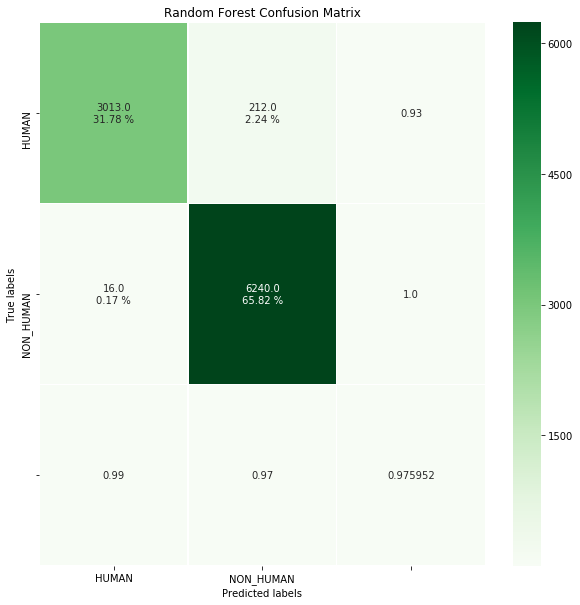

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(normalized_X_train, train_y)
result = clf.predict(normalized_X_test)

cm = confusion_matrix(test_y, result)
print(cm)
print("Accuracy: ",accuracy_score(test_y, result))
labels = ['HUMAN', 'NON_HUMAN']
title = ('Random Forest Confusion Matrix')
create_confusion_matrix(test_y, result)

[[3096  129]
 [  11 6245]]
Accuracy:  0.9852336251450269
Precision: Class A 1.0
Precision: Class B 0.98


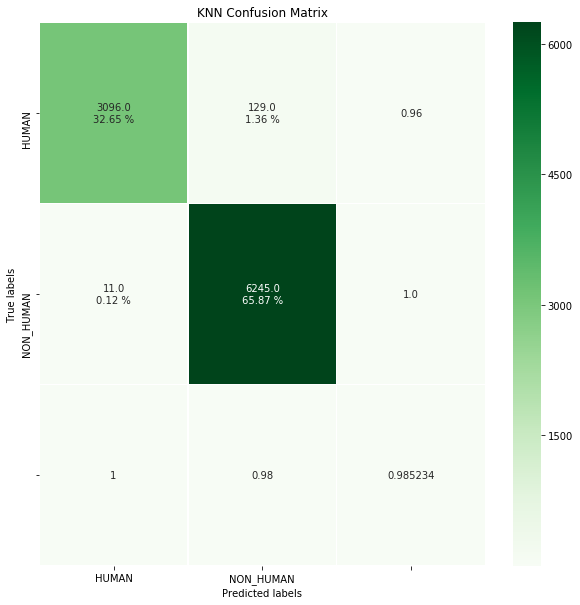

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(normalized_X_train, train_y)
result = clf.predict(normalized_X_test)

cm = confusion_matrix(test_y, result)
print(cm)
print("Accuracy: ",accuracy_score(test_y, result))
labels = ['HUMAN', 'NON_HUMAN']
title = ('KNN Confusion Matrix')
create_confusion_matrix(test_y, result)

In [11]:
#using PCA


from sklearn.decomposition import PCA
pca = PCA(n_components = 12, whiten='True')
pca_x = pca.fit(data).transform(data)
pca_x.shape

(28728, 12)

In [12]:
train_X, test_X, train_y, test_y = train_test_split(pca_x, label, test_size=0.33, random_state=42)

print('X train data:', np.array(train_X).shape)
print('X test data:', np.array(test_X).shape)
print('y train data:', np.array(train_y).shape)
print('y test data:', np.array(test_y).shape)
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(train_X)
normalized_X_test = preprocessing.normalize(test_X)

X train data: (19247, 12)
X test data: (9481, 12)
y train data: (19247,)
y test data: (9481,)


[[3125  100]
 [  15 6241]]
Accuracy:  0.9878704777977007
Precision: Class A 1.0
Precision: Class B 0.98


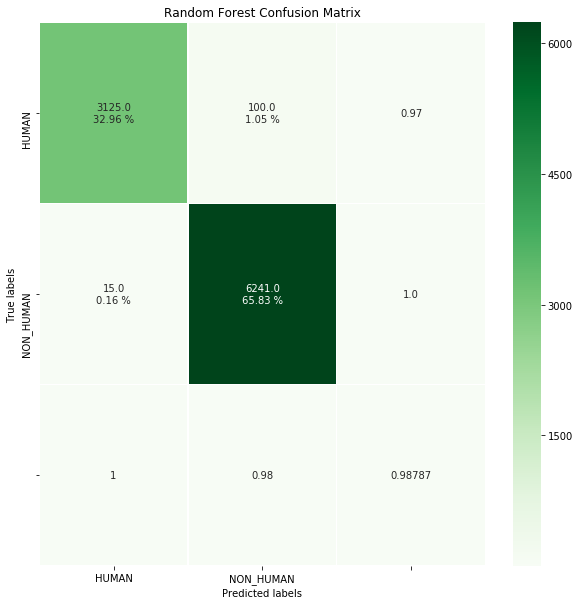

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

clf = RandomForestClassifier(n_estimators=100)
clf.fit(normalized_X_train, train_y)
result = clf.predict(normalized_X_test)

cm = confusion_matrix(test_y, result)
print(cm)
print("Accuracy: ",accuracy_score(test_y, result))
labels = ['HUMAN', 'NON_HUMAN']
title = ('Random Forest Confusion Matrix')
create_confusion_matrix(test_y, result)

[[3189   36]
 [   5 6251]]
Accuracy:  0.995675561649615
Precision: Class A 1.0
Precision: Class B 0.99


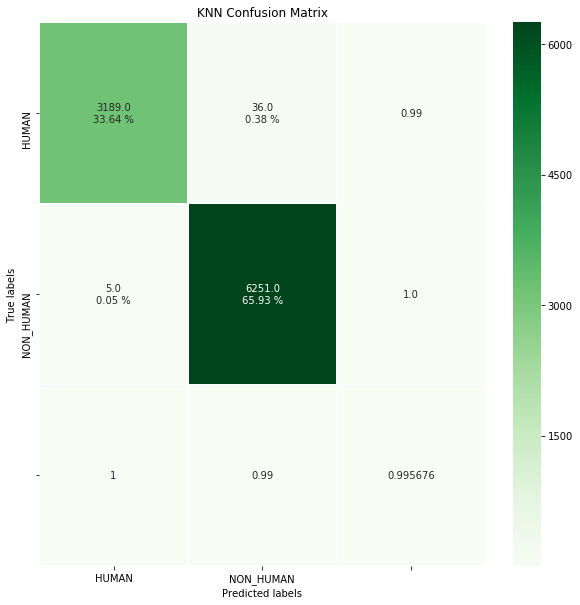

In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(normalized_X_train, train_y)
result = clf.predict(normalized_X_test)

cm = confusion_matrix(test_y, result)
print(cm)
print("Accuracy: ",accuracy_score(test_y, result))
labels = ['HUMAN', 'NON_HUMAN']
title = ('KNN Confusion Matrix')
create_confusion_matrix(test_y, result)